# Projeto Final - Tera - Data Science
Notebooks destinados ao desenvolvimento do projeto final do treinamento Tera - Data Science
## EDA
1. Objetivo:
    1. Identificar padrões nos dados
    2. Identificar anomalias nos dados
2. Output:
    1. DataSet processado e com as anomalias tratadas
    2. Insights para sequência das análises do projeto

In [1]:
# Bibliotecas Padrões
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [5]:
df = pd.read_csv('../data/raw/walmart_cleaned.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


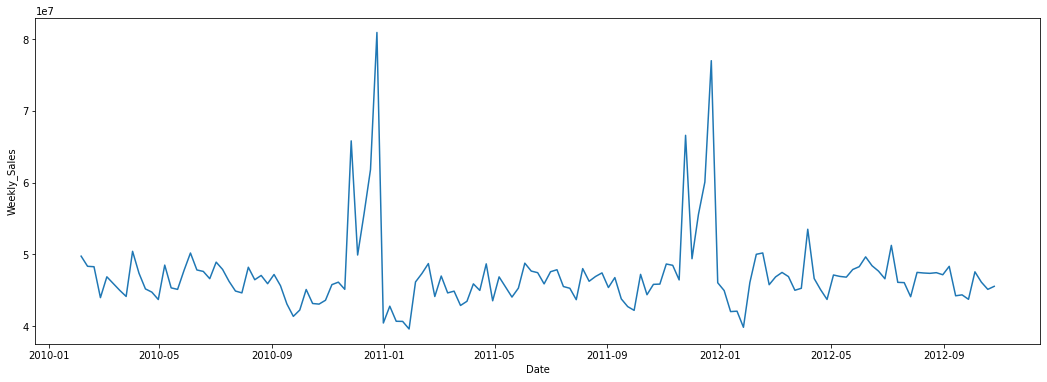

In [9]:
df_plot = pd.DataFrame(df.groupby('Date')['Weekly_Sales'].sum()).reset_index()

fig, ax = plt.subplots(figsize=[18,6])

ax = sns.lineplot(
    x='Date',
    y='Weekly_Sales',
    data=df_plot
)

plt.show()

del df_plot

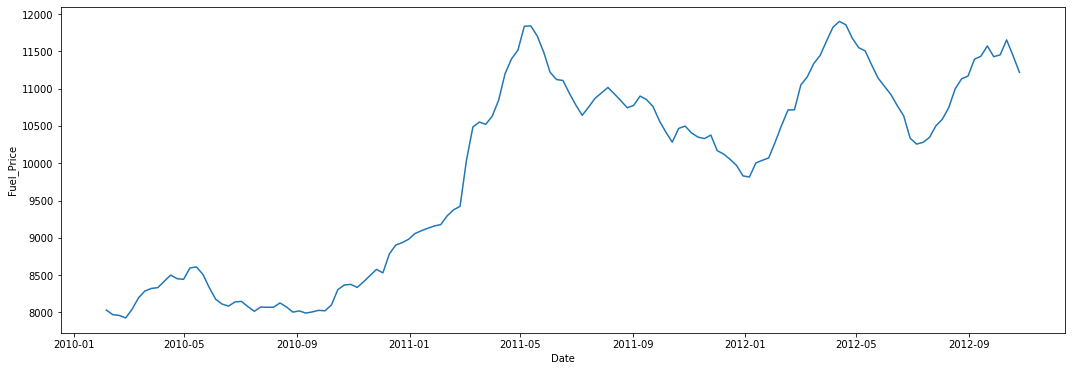

In [10]:
df_plot = pd.DataFrame(df.groupby('Date')['Fuel_Price'].sum()).reset_index()

fig, ax = plt.subplots(figsize=[18,6])

ax = sns.lineplot(
    x='Date',
    y='Fuel_Price',
    data=df_plot
)

plt.show()

del df_plot

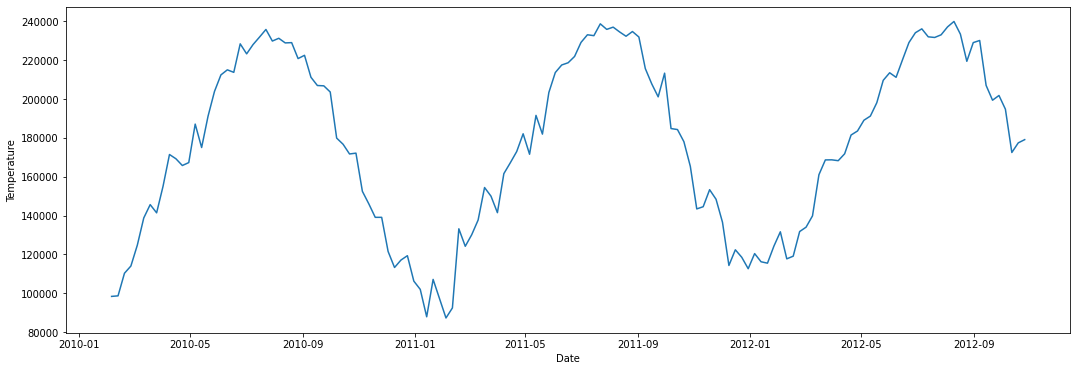

In [11]:
df_plot = pd.DataFrame(df.groupby('Date')['Temperature'].sum()).reset_index()

fig, ax = plt.subplots(figsize=[18,6])

ax = sns.lineplot(
    x='Date',
    y='Temperature',
    data=df_plot
)

plt.show()

del df_plot

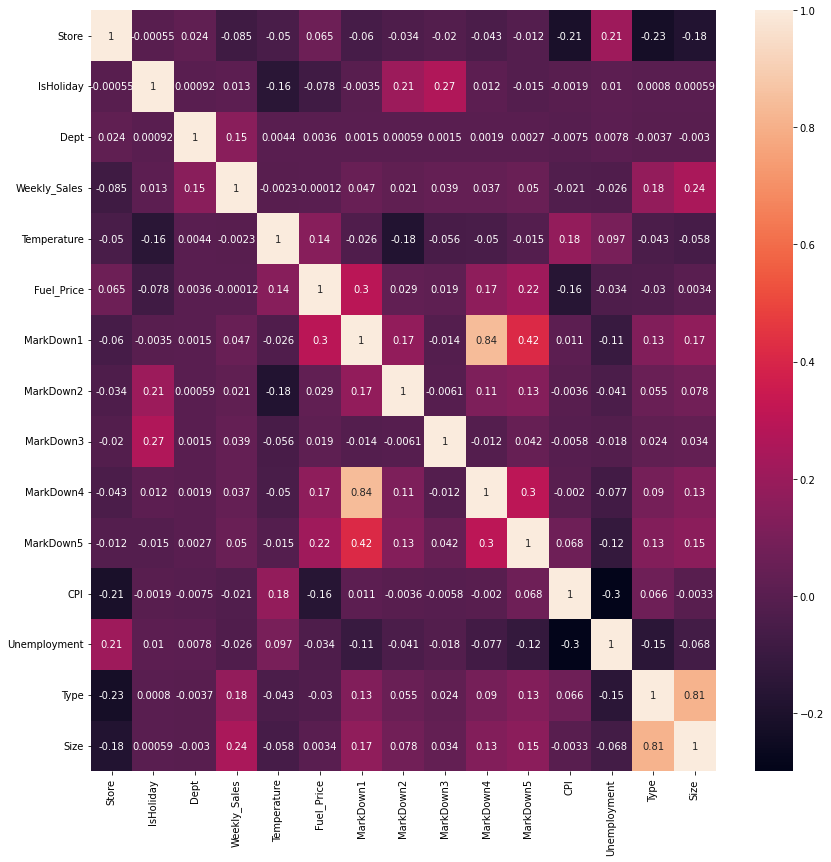

In [15]:
plt.figure(figsize=[14,14])

sns.heatmap(df.corr(), cbar=True, annot=True)

plt.show()

In [16]:
df.head(1)

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,2010-02-05,0,1.0,24924.5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [24]:
df_model = df.groupby(['Date','Store','IsHoliday']).agg({
    'Weekly_Sales':'sum',
    'Temperature':'mean',
    'Fuel_Price':'mean',
    'Size':'mean',
    'Type':'median'
}).reset_index()

df_model

,Date,Store,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,Size,Type
0,2010-02-05,1,0,1643690.90,42.31,2.572,151315,3
1,2010-02-05,2,0,2136989.46,40.19,2.572,202307,3
2,2010-02-05,3,0,461622.22,45.71,2.572,37392,2
3,2010-02-05,4,0,2135143.87,43.76,2.598,205863,3
4,2010-02-05,5,0,317173.10,39.70,2.572,34875,2
...,...,...,...,...,...,...,...,...
6430,2012-10-26,41,0,1316542.59,41.80,3.686,196321,3
6431,2012-10-26,42,0,514756.08,70.50,4.301,39690,1
6432,2012-10-26,43,0,587603.55,69.17,3.506,41062,1
6433,2012-10-26,44,0,361067.07,46.97,3.755,39910,1


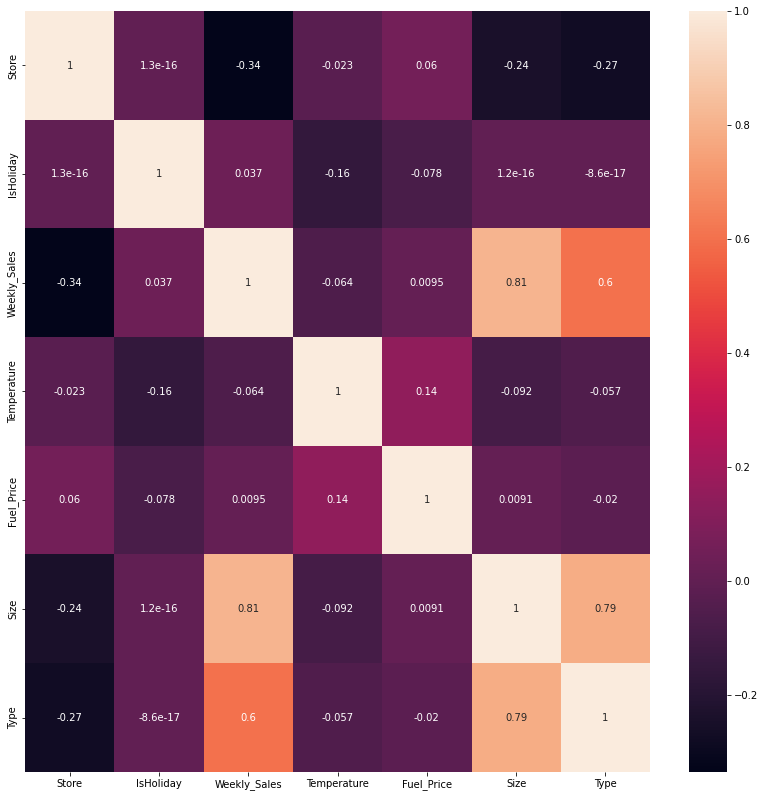

In [25]:
plt.figure(figsize=[14,14])

sns.heatmap(df_model.corr(), cbar=True, annot=True)

plt.show()

In [26]:
df_model.to_csv('../data/intermediate/df_model.csv', sep=';', index=False)